In [ ]:
# original image에 대해 running diff 이미지 만들어서 저장
# diff 이미지 순서 txt파일 저장: data_running_df.txt
from dataset import load_file_list
from config import PATH
import os
import astropy.io.fits as fits
import numpy as np
from datetime import datetime
from tqdm import tqdm
import warnings
warnings.simplefilter('ignore')

# 1. 리스트 불러오기
lst = load_file_list("data1024test.txt")

# 2. 저장 폴더 준비
save_folder = "./running_diff/original_test_rd/"

# 3. 이미지 + 헤더 불러오는 함수
def get_image(idx):
    filename = lst[idx]
    img_path = os.path.join(PATH, filename)
    data = fits.open(img_path)[0]
    img = data.data.astype(np.float32)
    exptime = data.header['EXPTIME']
    header = data.header
    name_without_ext = filename.split('.')[0]
    date_obs = datetime.strptime(name_without_ext, "%Y%m%d_%H%M%S")
    return img, exptime, date_obs, header

# 4. diff 이미지 계산 및 저장
for i in tqdm(range(1, len(lst))):
    try:
        img0, exp0, dt0, header0 = get_image(i - 1)
        img1, exp1, dt1, header1 = get_image(i)

        delta = (dt1 - dt0).total_seconds()

        if delta > 5400:  # 1시간 30분 이상인 경우는 스킵
            # print(f"⏩ Skipping idx {i-1}-{i}: delta = {delta:.1f}s")
            continue

        # 노출시간으로 정규화
        img_diff = img1 / exp1 - img0 / exp0
        
        # 헤더 설정
        new_header = header1.copy()
        new_header['HISTORY'] = f"Diff image created from idx {i-1} and {i}"
        new_header['DELTA'] = (dt1 - dt0).total_seconds()
        new_header['DIFF'] = True
        new_header['IMG0'] = lst[i - 1]
        new_header['IMG1'] = lst[i]
        
        # 저장 파일명
        filename = lst[i]
        save_path = os.path.join(save_folder, filename)
        
        # 저장
        hdu = fits.PrimaryHDU(data=img_diff, header=new_header)
        
        hdu.writeto(save_path, overwrite=True, output_verify="ignore")
        # print(f"✅ Saved: {filename} (Δt={delta:.1f}s)")

    except Exception as e:
        print(f"❌ Error at index {i-1}-{i}: {e}")
        break
print("end")

100%|██████████| 2063/2063 [00:19<00:00, 105.98it/s]

end


In [4]:
import os
ft = os.listdir("running_diff/ft_test/")
pt1 = os.listdir("running_diff/pt1_test/")
pt2 = os.listdir("running_diff/pt2_test/")
pt3 = os.listdir("running_diff/pt3_test/")
pt4 = os.listdir("running_diff/pt4_test/")
pt5 = os.listdir("running_diff/pt5_test/")
pt6 = os.listdir("running_diff/pt6_test/")
jpeg1 = os.listdir("running_diff/jpeg_test/jpeg_test_1/")
jpeg50 = os.listdir("running_diff/jpeg_test/jpeg_test_50/")
jpeg90 = os.listdir("running_diff/jpeg_test/jpeg_test_90/")
jpeg95 = os.listdir("running_diff/jpeg_test/jpeg_test_95/")
jpeg100 = os.listdir("running_diff/jpeg_test/jpeg_test_100/")
rice = os.listdir("running_diff/rice_test/")
print(len(ft))
print(len(pt1))
print(len(pt2))
print(len(pt3))
print(len(pt4))
print(len(pt5))
print(len(pt6))
print(len(jpeg1))
print(len(jpeg50))
print(len(jpeg90))
print(len(jpeg95))
print(len(jpeg100))
print(len(rice))

2064
2064
2064
2064
2064
2064
2064
2064
2064
2064
2064
2064
2064


In [20]:
import os

# 1. 파일 이름 읽어오기
folder_path = './running_diff/original_test_rd/'  # 예: 'C:/Users/Inseong/Desktop/my_folder'
file_list = sorted(os.listdir(folder_path)) # sorting

# 파일만 필터링 (폴더 제외하고)
file_list = [f for f in file_list if os.path.isfile(os.path.join(folder_path, f))]

# 2. 리스트를 txt 파일로 저장
save_path = 'data1024test_rd.txt'
with open(save_path, 'w', encoding='utf-8') as f:
    for filename in file_list:
        f.write(filename + '\n')

print(f"총 {len(file_list)}개의 파일 이름이 '{save_path}'에 저장되었습니다.")


총 396개의 파일 이름이 'data1024test_rd.txt'에 저장되었습니다.


len(data): 396
1997/08/07 16:58:01.920
19970807_165801.fts
0일 1시간 8분 26초


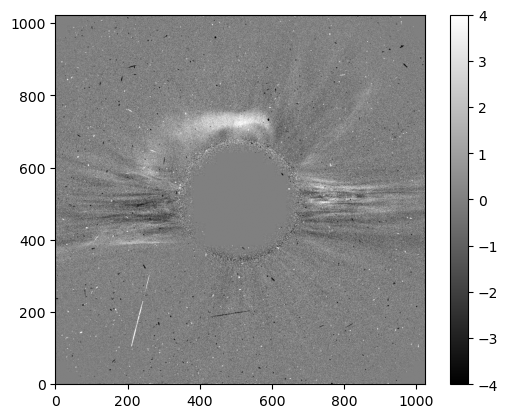

In [22]:
# original test rd data에 대해 1장 plot
from dataset import load_file_list
import matplotlib.pyplot as plt

lst = load_file_list("data1024test_rd.txt")
print("len(data):",len(lst))

def get_image(idx):
    filename= lst[idx]
    img_path = os.path.join("./running_diff/original_test_rd/", filename)
    data = fits.open(img_path)[0]
    img = data.data
    exptime = data.header['EXPTIME']
    delta = data.header['DELTA']
    obs_time = data.header['DATE-OBS'] +" "+ data.header['TIME-OBS']
    return img, exptime, delta, obs_time

def get_date(sec):
    days = int(sec // (24 * 3600))
    hours = int((sec % (24 * 3600)) // 3600)
    minutes = int((sec % 3600) // 60)
    seconds = int(sec % 60)
    return days, hours, minutes, seconds

# 14,
img,_,delta, obs_time = get_image(0)
vmin = -4
vmax= 4
days, hours, minutes, seconds = get_date(delta)
print(obs_time)
print(lst[0])
print(f"{days}일 {hours}시간 {minutes}분 {seconds}초")

plt.imshow(img, origin="lower",cmap="gray",vmin=vmin, vmax=vmax)
plt.colorbar(orientation='vertical')


In [1]:
# pretrained{i} 모델 입출력해서 데이터 저장 -> data_test_pretrained{i} 폴더에 fits로 저장 
# finetuned, pretrained, jpeg, rice 방법으로 test set 데이터 decompressed해서 파일에 저장
import torch
from compressai.zoo import cheng2020_attn
from tqdm import tqdm
from transforms import get_train_transform, get_ori_transform # 512사이즈로 줄여야 하기에 train_transform
import os
import astropy.io.fits as fits
from config import PATH, device
import io
import numpy as np
from PIL import Image
import warnings
warnings.simplefilter('ignore')

def unpreprocess(maxv_log, minv_log, res_img):
    res_img = res_img[0][0] # (B,3,H,W) -> (H,W)
    res_img = res_img * (maxv_log - minv_log) + minv_log
    res_img = torch.expm1(res_img)
    return res_img

def load_file_list(txt_path):
    with open(txt_path, 'r') as f:
        return [line.strip() for line in f.readlines()]

def byte_scale(img):
    img_min = img.min()
    img_max = img.max()
    scaled_img = (img - img_min) / (img_max - img_min) * 255.0
    return np.clip(scaled_img, 0, 255).astype(np.uint8)

def de_scale(maxv,minv, out):
    res = (out / 255.0) * (maxv - minv) + minv
    return res

def compress_jpeg(img, quality):
    """Compress image using JPEG with specified quality"""
    # Convert to uint8 for JPEG compression
    img = byte_scale(img)
    
    # Compress using PIL
    img_pil = Image.fromarray(img)
    buffer = io.BytesIO()
    img_pil.save(buffer, format='JPEG', quality=quality)
    compressed_size = buffer.tell()
    
    # Decompress
    buffer.seek(0)
    decompressed = Image.open(buffer)
    decompressed = np.array(decompressed)
    
    # Scale back to original range
    decompressed = (decompressed / 255.0 * (img.max() - img.min()) + img.min()).astype(np.int16)
    
    return compressed_size, decompressed

def compress_rice(data):
    """Compress image using RICE compression"""
    data = byte_scale(data)
    compressed_hdu = fits.CompImageHDU(data=data, compression_type='RICE_1', tile_shape=(256,256))
    with io.BytesIO() as buffer:
        compressed_hdu.writeto(buffer)
        compressed_size = buffer.tell()
        buffer.seek(0)
        
    restored = compressed_hdu.data

    return compressed_size, restored

# pretrained model 갖고오기
model_pretrained6 = cheng2020_attn(pretrained=True, quality=6).to(device).eval()
model_pretrained5 = cheng2020_attn(pretrained=True, quality=5).to(device).eval()
model_pretrained4 = cheng2020_attn(pretrained=True, quality=4).to(device).eval()
model_pretrained3 = cheng2020_attn(pretrained=True, quality=3).to(device).eval()
model_pretrained2 = cheng2020_attn(pretrained=True, quality=2).to(device).eval()
model_pretrained1 = cheng2020_attn(pretrained=True, quality=1).to(device).eval()

# finetuned model 갖고오기
model_finetuned = cheng2020_attn(pretrained=False, quality=6)
checkpoint = torch.load("best_model4.pth", map_location=device)
model_finetuned.load_state_dict(checkpoint, strict=True)
model_finetuned = model_finetuned.to(device)
model_finetuned.eval()

jpeg_qualities = [1, 50, 90, 95, 100]

# data lst 가져오기
namelst = load_file_list("data1024test.txt")

transform = get_train_transform()
ori_transform = get_ori_transform()

with torch.no_grad():
    for filename in tqdm(namelst):
        try:
            img_path = os.path.join(PATH, filename)
            image_fits = fits.open(img_path)[0]
            image_ori = image_fits.data # image
            image_header = image_fits.header # heaer
            image_pr = transform(image_ori) # 전처리
            image_pr = image_pr.unsqueeze(0) # (1,3,512,512)
            image_ori = ori_transform(image_ori) # ori 전처리
            image_pr = image_pr.to(device, non_blocking=True)

            # input the images to models
            ## pretrained
            output_pt6 = model_pretrained6(image_pr)
            output_pt5 = model_pretrained5(image_pr)
            output_pt4 = model_pretrained4(image_pr)
            output_pt3 = model_pretrained3(image_pr)
            output_pt2 = model_pretrained2(image_pr)
            output_pt1 = model_pretrained1(image_pr)
            
            ## finetuned
            output_ft = model_finetuned(image_pr)
            
            ## jpeg
            image_ori_array = image_ori.squeeze().cpu().numpy()
            maxv, minv = image_ori_array.max(), image_ori_array.min()
            for quality in jpeg_qualities:
                _, jpeg_decompressed = compress_jpeg(image_ori_array, quality)
                jpeg_decompressed = de_scale(maxv, minv, jpeg_decompressed)
                new_header_jpeg = image_header.copy()
                new_header_jpeg['MODEL'], new_header_jpeg['NAXIS1'], new_header_jpeg['NAXIS2'] = f"JPEG_{quality}", 512, 512
                saved_filename_jpeg = filename
                save_path_jpeg = os.path.join(f"./running_diff/jpeg_test/jpeg_test_{quality}/",saved_filename_jpeg)
                hdu_jpeg = fits.PrimaryHDU(data=jpeg_decompressed, header=new_header_jpeg)
                hdu_jpeg.writeto(save_path_jpeg, overwrite=True, output_verify="ignore")
            
            ## rice
            _, rice_decompressed = compress_rice(image_ori_array)
            

            pt6_xhat = output_pt6['x_hat']
            pt5_xhat = output_pt5['x_hat']
            pt4_xhat = output_pt4['x_hat']
            pt3_xhat = output_pt3['x_hat']
            pt2_xhat = output_pt2['x_hat']
            pt1_xhat = output_pt1['x_hat']
            ft_xhat = output_ft['x_hat']

            log_ori = torch.log1p(torch.clamp(image_ori,min=0))
            maxv_log = log_ori.max()
            minv_log = log_ori.min()

            # unpreprocess
            pt6_unpr = unpreprocess(maxv_log, minv_log, pt6_xhat).cpu().numpy()
            pt5_unpr = unpreprocess(maxv_log, minv_log, pt5_xhat).cpu().numpy()
            pt4_unpr = unpreprocess(maxv_log, minv_log, pt4_xhat).cpu().numpy()
            pt3_unpr = unpreprocess(maxv_log, minv_log, pt3_xhat).cpu().numpy()
            pt2_unpr = unpreprocess(maxv_log, minv_log, pt2_xhat).cpu().numpy()
            pt1_unpr = unpreprocess(maxv_log, minv_log, pt1_xhat).cpu().numpy()
            ft_unpr = unpreprocess(maxv_log, minv_log, ft_xhat).cpu().numpy()
            rice_unpr = de_scale(maxv, minv, rice_decompressed)

            # 헤더 설정
            new_header6 = image_header.copy()
            new_header5 = image_header.copy()
            new_header4 = image_header.copy()
            new_header3 = image_header.copy()
            new_header2 = image_header.copy()
            new_header1 = image_header.copy()
            new_header_ft = image_header.copy()
            new_header_rice = image_header.copy()

            new_header6['MODEL'], new_header6['NAXIS1'], new_header6['NAXIS2'] = "cheng2020_attn6", 512, 512
            new_header5['MODEL'], new_header5['NAXIS1'], new_header5['NAXIS2'] = "cheng2020_attn5", 512, 512
            new_header4['MODEL'], new_header4['NAXIS1'], new_header4['NAXIS2'] = "cheng2020_attn4", 512, 512
            new_header3['MODEL'], new_header3['NAXIS1'], new_header3['NAXIS2'] = "cheng2020_attn3", 512, 512
            new_header2['MODEL'], new_header2['NAXIS1'], new_header2['NAXIS2'] = "cheng2020_attn2", 512, 512
            new_header1['MODEL'], new_header1['NAXIS1'], new_header1['NAXIS2'] = "cheng2020_attn1", 512, 512
            new_header_ft['MODEL'], new_header_ft['NAXIS1'], new_header_ft['NAXIS2'] = "cheng2020_attn_ft", 512, 512
            new_header_rice['MODEL'], new_header_rice['NAXIS1'], new_header_rice['NAXIS2'] = "RICE", 512, 512


            # 저장 파일명
            saved_filename6 = filename 
            saved_filename5 = filename 
            saved_filename4 = filename 
            saved_filename3 = filename 
            saved_filename2 = filename 
            saved_filename1 = filename 
            saved_filename_ft = filename
            saved_filename_rice = filename

            save_path6 = os.path.join("./running_diff/pt6_test/",saved_filename6)
            save_path5 = os.path.join("./running_diff/pt5_test/",saved_filename5)
            save_path4 = os.path.join("./running_diff/pt4_test/",saved_filename4)
            save_path3 = os.path.join("./running_diff/pt3_test/",saved_filename3)
            save_path2 = os.path.join("./running_diff/pt2_test/",saved_filename2)
            save_path1 = os.path.join("./running_diff/pt1_test/",saved_filename1)
            save_path_ft = os.path.join("./running_diff/ft_test/",saved_filename_ft)
            save_path_rice = os.path.join("./running_diff/rice_test/",saved_filename_rice)

            # 저장
            hdu6 = fits.PrimaryHDU(data=pt6_unpr, header=new_header6)
            hdu5 = fits.PrimaryHDU(data=pt5_unpr, header=new_header5)
            hdu4 = fits.PrimaryHDU(data=pt4_unpr, header=new_header4)
            hdu3 = fits.PrimaryHDU(data=pt3_unpr, header=new_header3)
            hdu2 = fits.PrimaryHDU(data=pt2_unpr, header=new_header2)
            hdu1 = fits.PrimaryHDU(data=pt1_unpr, header=new_header1)
            hdu_ft = fits.PrimaryHDU(data=ft_unpr, header=new_header_ft)
            hdu_rice = fits.PrimaryHDU(data=rice_unpr, header=new_header_rice)
            hdu6.writeto(save_path6, overwrite=True, output_verify="ignore")
            hdu5.writeto(save_path5, overwrite=True, output_verify="ignore")
            hdu4.writeto(save_path4, overwrite=True, output_verify="ignore")
            hdu3.writeto(save_path3, overwrite=True, output_verify="ignore")
            hdu2.writeto(save_path2, overwrite=True, output_verify="ignore")
            hdu1.writeto(save_path1, overwrite=True, output_verify="ignore")
            hdu_ft.writeto(save_path_ft, overwrite=True, output_verify="ignore")
            hdu_rice.writeto(save_path_rice, overwrite=True, output_verify="ignore")
        
        except Exception as e:
            print(filename)
            raise(e)

100%|██████████| 2064/2064 [12:38<00:00,  2.72it/s]


In [5]:
# running df 이미지 만들어서 저장
from datetime import datetime
from tqdm import tqdm
import astropy.io.fits as fits
import numpy as np
import os
import warnings
from dataset import load_file_list

warnings.simplefilter('ignore')
    

# 3. 이미지 + 헤더 불러오는 함수
# 0:finetuned, 1~6:pretrained, 7:jpeg_1, 8:jpeg_50, 9:jpeg_90, 10:jpeg_95, 11:jpeg_100, 12:rice
def get_image(model_idx, idx): 
    if model_idx == 0:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/ft_test/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx > 0 and model_idx < 7:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/pt{model_idx}_test/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 7:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test/jpeg_test_1/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 8:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test/jpeg_test_50/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 9:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test/jpeg_test_90/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 10:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test/jpeg_test_95/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 11:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test/jpeg_test_100/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 12:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/rice_test/"
        img_path = os.path.join(directory_path,filename)
    else:
        raise("out of model_idx range")
    

    data = fits.open(img_path)[0]
    img = data.data.astype(np.float32)
    exptime = data.header['EXPTIME']
    header = data.header
    date_obs = header.get('DATE-OBS')
    time_obs = header.get('TIME-OBS')
    date_obs = datetime.strptime(f"{date_obs} {time_obs}", "%Y/%m/%d %H:%M:%S.%f")

    return img, exptime, date_obs, header

def save_image(model_idx, filename, image, new_header): 
    if model_idx == 0:
        directory_path = f"./running_diff/ft_test_rd/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx > 0 and model_idx < 7:
        directory_path = f"./running_diff/pt{model_idx}_test_rd/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 7:
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_1/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 8:
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_50/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 9:
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_90/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 10:
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_95/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 11:
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_100/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 12:
        directory_path = f"./running_diff/rice_test_rd/"
        img_path = os.path.join(directory_path,filename)
    else:
        raise("out of model_idx range")
    
    # 저장
    hdu = fits.PrimaryHDU(data=image, header=new_header)
    hdu.writeto(img_path, overwrite=True, output_verify="ignore")

namelst = load_file_list("data1024test.txt")

# 4. diff 이미지 계산 및 저장
for i in tqdm(range(1, len(namelst))):
    try:
        for j in range(13):
            img0, exp0, dt0, header0 = get_image(j,i - 1)
            img1, exp1, dt1, header1 = get_image(j,i)

            delta = (dt1 - dt0).total_seconds()

            if delta > 5400:  # 1시간 30분 이상인 경우는 스킵
                # print(f"⏩ Skipping idx {i-1}-{i}: delta = {delta:.1f}s")
                continue

            # 노출시간으로 정규화
            img_diff = img1 / exp1 - img0 / exp0
            
            # 헤더 설정
            new_header = header1.copy()
            new_header['HISTORY'] = f"Diff image created from idx {i-1} and {i}"
            new_header['DELTA'] = (dt1 - dt0).total_seconds()
            new_header['DIFF'] = True
            new_header['IMG0'] = namelst[i - 1]
            new_header['IMG1'] = namelst[i]
            
            # 저장 파일명
            filename = namelst[i]
            save_image(model_idx=j, filename=filename, image=img_diff, new_header=new_header)

            # print(f"✅ Saved: {filename} (Δt={delta:.1f}s)")

    except Exception as e:
        print(f"❌ Error at index {i-1}-{i}: {e}")
        break

100%|██████████| 2063/2063 [02:58<00:00, 11.58it/s]


In [6]:
import os
ft = os.listdir("running_diff/ft_test_rd/")
pt1 = os.listdir("running_diff/pt1_test_rd/")
pt2 = os.listdir("running_diff/pt2_test_rd/")
pt3 = os.listdir("running_diff/pt3_test_rd/")
pt4 = os.listdir("running_diff/pt4_test_rd/")
pt5 = os.listdir("running_diff/pt5_test_rd/")
pt6 = os.listdir("running_diff/pt6_test_rd/")
jpeg1 = os.listdir("running_diff/jpeg_test_rd/jpeg_test_rd_1/")
jpeg50 = os.listdir("running_diff/jpeg_test_rd/jpeg_test_rd_50/")
jpeg90 = os.listdir("running_diff/jpeg_test_rd/jpeg_test_rd_90/")
jpeg95 = os.listdir("running_diff/jpeg_test_rd/jpeg_test_rd_95/")
jpeg100 = os.listdir("running_diff/jpeg_test_rd/jpeg_test_rd_100/")
rice = os.listdir("running_diff/rice_test_rd/")
print(len(ft))
print(len(pt1))
print(len(pt2))
print(len(pt3))
print(len(pt4))
print(len(pt5))
print(len(pt6))
print(len(jpeg1))
print(len(jpeg50))
print(len(jpeg90))
print(len(jpeg95))
print(len(jpeg100))
print(len(rice))

396
396
396
396
396
396
396
396
396
396
396
396
396


idx: 20
2000/01/04 12:06:05.768
0일 0시간 11분 37초


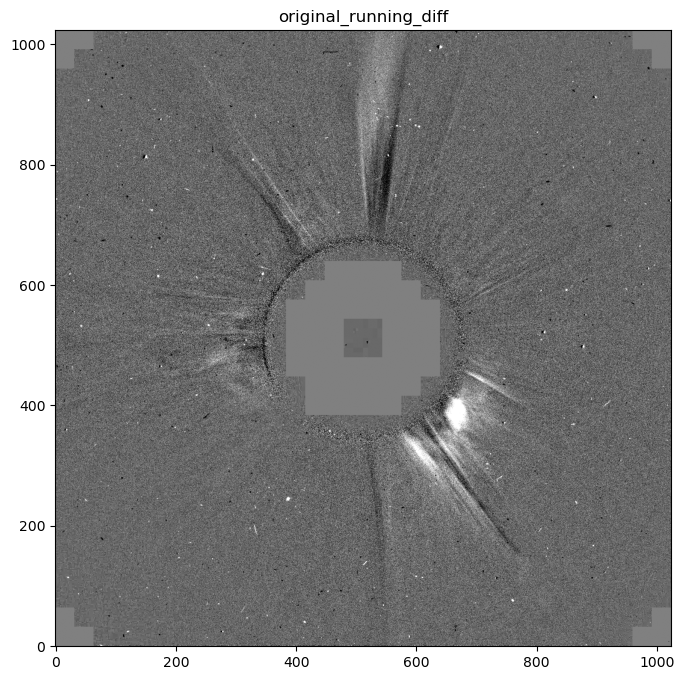

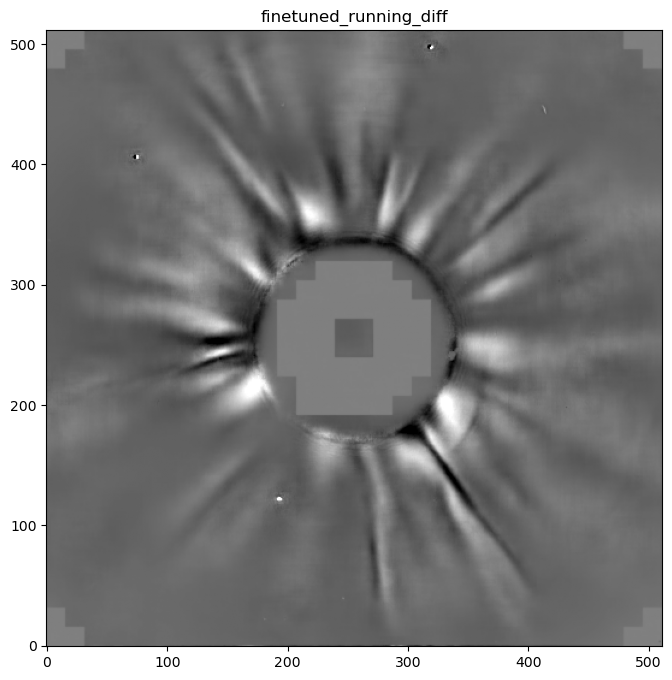

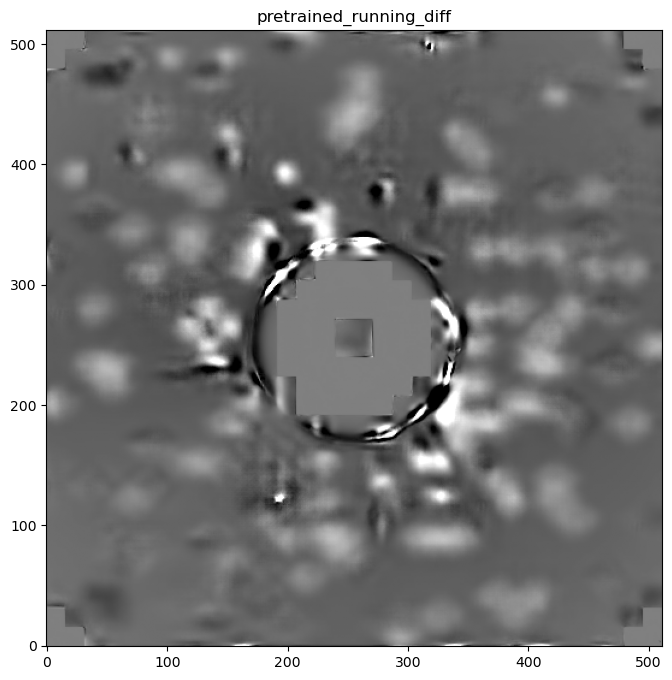

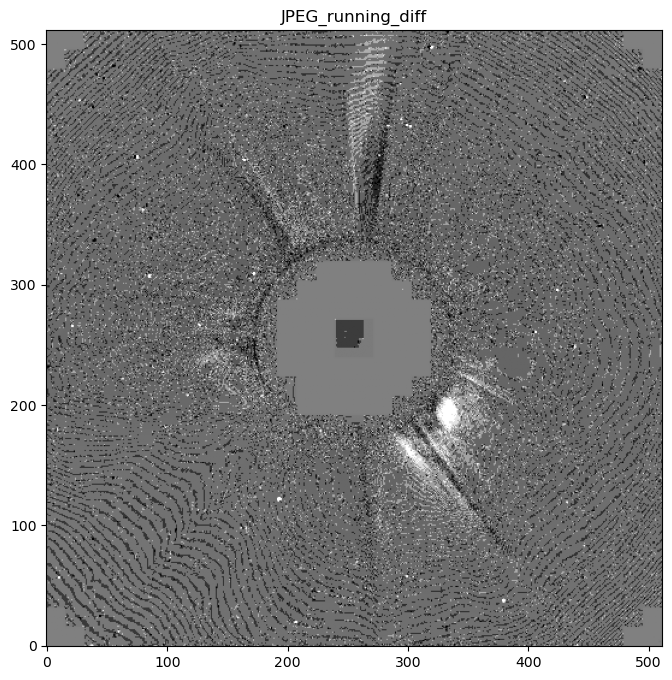

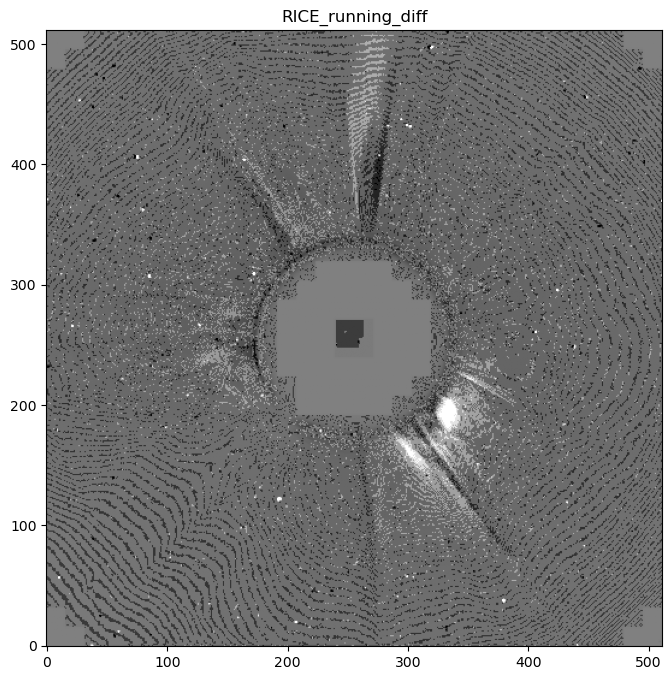

In [13]:
# running diff 이미지 한장 확인
from dataset import load_file_list
import os
import astropy.io.fits as fits
import matplotlib.pyplot as plt

namelst = load_file_list("data1024test_rd.txt")

# 396개의 rd 데이터
def get_image(model_idx, idx): 
    if model_idx == -1:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/original_test_rd/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 0:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/ft_test_rd/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx > 0 and model_idx < 7:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/pt{model_idx}_test_rd/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 7:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_1/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 8:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_50/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 9:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_90/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 10:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_95/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 11:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/jpeg_test_rd/jpeg_test_rd_100/"
        img_path = os.path.join(directory_path,filename)
    elif model_idx == 12:
        filename = f"{namelst[idx]}"
        directory_path = f"./running_diff/rice_test_rd/"
        img_path = os.path.join(directory_path,filename)
    else:
        raise("out of model_idx range")
    

    data = fits.open(img_path)[0]
    img = data.data
    exptime = data.header['EXPTIME']
    delta = data.header['DELTA']
    obs_time = data.header['DATE-OBS'] +" "+ data.header['TIME-OBS']
    return img, exptime, delta, obs_time

def get_date(sec):
    days = int(sec // (24 * 3600))
    hours = int((sec % (24 * 3600)) // 3600)
    minutes = int((sec % 3600) // 60)
    seconds = int(sec % 60)
    return days, hours, minutes, seconds


vmin = -5
vmax= 5
density_tf = True
idx = 20
print("idx:",idx)
# interesting idx: 8:강함, 20:약함, 
img_ori,_,delta, obs_time = get_image(-1,idx)
img_ft,_,_,_ = get_image(0,idx)
img1,_,_,_ = get_image(1,idx)
img2,_,_,_ = get_image(2,idx)
img3,_,_,_ = get_image(3,idx)
img4,_,_,_ = get_image(4,idx)
img5,_,_,_ = get_image(5,idx)
img6,_,_,_ = get_image(6,idx)
img7,_,_,_ = get_image(7,idx)
img8,_,_,_ = get_image(8,idx)
img9,_,_,_ = get_image(9,idx)
img10,_,_,_ = get_image(10,idx)
img11,_,_,_ = get_image(11,idx)
img12,_,_,_ = get_image(12,idx)
days, hours, minutes, seconds = get_date(delta)
print(obs_time)
print(f"{days}일 {hours}시간 {minutes}분 {seconds}초")

plt.figure(figsize=(12,8))
plt.imshow(img_ori, origin="lower",cmap="gray",vmin=vmin, vmax=vmax)
# plt.colorbar(orientation='vertical')
plt.title("original_running_diff")
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(img_ft, origin="lower",cmap="gray",vmin=vmin, vmax=vmax)
# plt.colorbar(orientation='vertical')
plt.title("finetuned_running_diff")
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(img6, origin="lower",cmap="gray",vmin=vmin, vmax=vmax)
# plt.colorbar(orientation='vertical')
plt.title("pretrained_running_diff")
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(img11, origin="lower",cmap="gray",vmin=vmin, vmax=vmax)
# plt.colorbar(orientation='vertical')
plt.title("JPEG_running_diff")
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(img12, origin="lower",cmap="gray",vmin=vmin, vmax=vmax)
# plt.colorbar(orientation='vertical')
plt.title("RICE_running_diff")
plt.show()